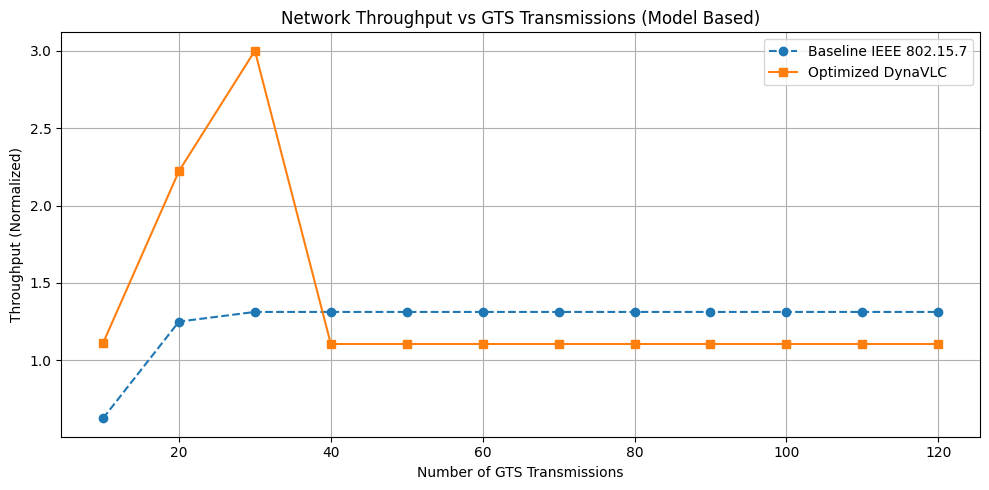

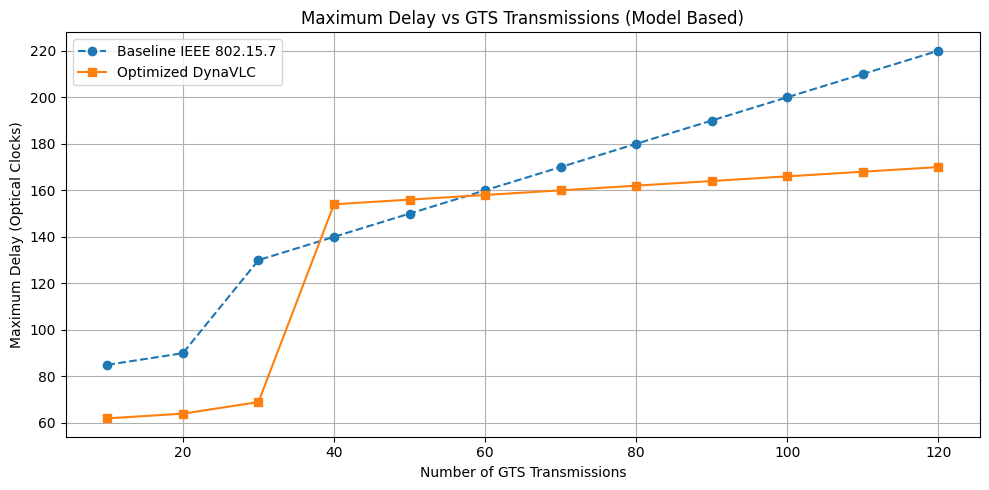

In [ ]:
# Rewriting the previous model with a safety limit on the loop to avoid infinite runtime

import matplotlib.pyplot as plt
import numpy as np

# Constants
C = 3  # Number of channels
CFP_base = 7  # Base CFP slots
data_rate = 1  # Mbps or normalized
TMS = 1  # Assume unit slot time for normalized throughput
max_gts = 120  # Max GTS demand
gts_transmissions = np.arange(10, max_gts + 1, 10)

# Baseline IEEE 802.15.7 model
def baseline_throughput(gts):
    used_slots = min(gts, C * CFP_base)
    return (used_slots / (CFP_base + 9)) * data_rate

def baseline_delay(gts):
    if gts <= C * CFP_base:
        return 80 + gts * 0.5
    else:
        return 100 + gts * 1.0

# Optimized DynaVLC model with safety cap
def dynavlc_throughput(gts):
    mo = 2
    cap_reduction = True
    max_iter = 10
    iter_count = 0

    while iter_count < max_iter:
        ncfp = C * (CFP_base + mo if cap_reduction else CFP_base)
        if gts <= ncfp:
            break
        mo += 1
        iter_count += 1
        if mo > 5:
            cap_reduction = False

    return (min(gts, ncfp) / (CFP_base + mo)) * data_rate

def dynavlc_delay(gts):
    mo = 2
    cap_reduction = True
    delay = 60
    max_iter = 10
    iter_count = 0

    while iter_count < max_iter:
        ncfp = C * (CFP_base + mo if cap_reduction else CFP_base)
        if gts <= ncfp:
            break
        mo += 1
        delay += 3
        iter_count += 1
        if mo > 5:
            cap_reduction = False
            delay += 8
    return delay + gts * 0.2

# Compute values
baseline_th = [baseline_throughput(gts) for gts in gts_transmissions]
dynavlc_th = [dynavlc_throughput(gts) for gts in gts_transmissions]
baseline_d = [baseline_delay(gts) for gts in gts_transmissions]
dynavlc_d = [dynavlc_delay(gts) for gts in gts_transmissions]

# Plot Throughput
plt.figure(figsize=(10, 5))
plt.plot(gts_transmissions, baseline_th, 'o--', label='Baseline IEEE 802.15.7')
plt.plot(gts_transmissions, dynavlc_th, 's-', label='Optimized DynaVLC')
plt.title('Network Throughput vs GTS Transmissions (Model Based)')
plt.xlabel('Number of GTS Transmissions')
plt.ylabel('Throughput (Normalized)')
plt.grid(True)
plt.legend()
plt.tight_layout()


# Plot Delay
plt.figure(figsize=(10, 5))
plt.plot(gts_transmissions, baseline_d, 'o--', label='Baseline IEEE 802.15.7')
plt.plot(gts_transmissions, dynavlc_d, 's-', label='Optimized DynaVLC')
plt.title('Maximum Delay vs GTS Transmissions (Model Based)')
plt.xlabel('Number of GTS Transmissions')
plt.ylabel('Maximum Delay (Optical Clocks)')
plt.grid(True)
plt.legend()
plt.tight_layout()


